In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
images.shape

(12311, 512, 512, 1)

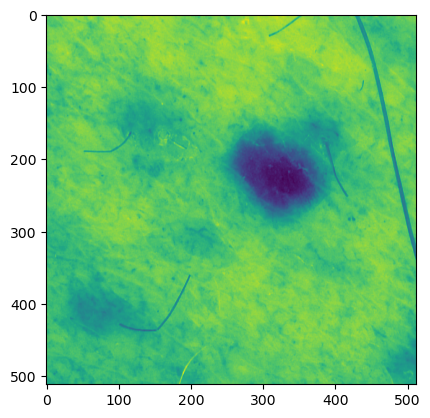

In [4]:
imshow(images[100])

In [5]:
masks.shape

(12311, 512, 512, 1)

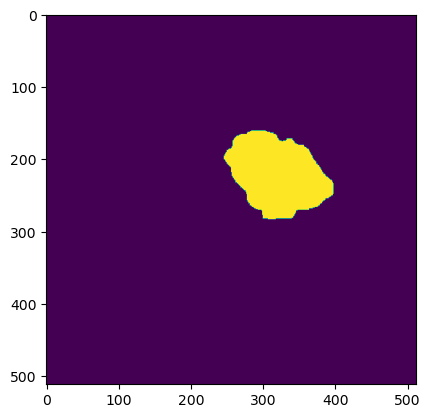

In [6]:
imshow(masks[100])

In [7]:
import sys
sys.path.append('../')
import gp2

In [8]:
from keras import losses

In [9]:
loss_fx = losses.BCE

In [10]:
C = gp2.KUC_UNet2D(loss=loss_fx)

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpk_e2j6v7kuc_unet2d


In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [12]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpk_e2j6v7kuc_unet2d
Verbose mode active!


In [13]:
R.classifier = C ### use custom classifier

In [14]:
R.setup_data(images, masks, dataset_size=12311, weights=weights)


Weights OK!


In [15]:
RUNS = 12

In [16]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier(batch_size=16)
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')

***
RUN: 0
Epoch 1/100
39/39 [==============================] - 38s 695ms/step - loss: 0.5395 - dice_coeff: 0.3008 - val_loss: 0.5370 - val_dice_coeff: 0.3063
Epoch 2/100
39/39 [==============================] - 19s 489ms/step - loss: 0.4902 - dice_coeff: 0.3666 - val_loss: 0.4794 - val_dice_coeff: 0.4052
Epoch 3/100
39/39 [==============================] - 19s 489ms/step - loss: 0.4597 - dice_coeff: 0.3993 - val_loss: 0.4775 - val_dice_coeff: 0.4187
Epoch 4/100
39/39 [==============================] - 19s 488ms/step - loss: 0.4230 - dice_coeff: 0.4910 - val_loss: 0.4148 - val_dice_coeff: 0.5374
Epoch 5/100
39/39 [==============================] - 19s 491ms/step - loss: 0.4308 - dice_coeff: 0.5043 - val_loss: 0.4547 - val_dice_coeff: 0.4996
Epoch 6/100
39/39 [==============================] - 19s 491ms/step - loss: 0.4244 - dice_coeff: 0.5063 - val_loss: 0.4181 - val_dice_coeff: 0.5245
Model saved to: /tmp/tmpk_e2j6v7kuc_unet2d/kuc_unet2d_0kuc_unet2d_model
History saved to: /tmp/tmpk_e

Epoch 6/100
85/85 [==============================] - 32s 374ms/step - loss: 0.3974 - dice_coeff: 0.5575 - val_loss: 0.3744 - val_dice_coeff: 0.5775
Model saved to: /tmp/tmpk_e2j6v7kuc_unet2d/kuc_unet2d_6kuc_unet2d_model
History saved to: /tmp/tmpk_e2j6v7kuc_unet2d/kuc_unet2d_history_6.pkl
Testing the classifier...
Testing the discriminator...
24/24 [==============================] - 1s 42ms/step - loss: 1.6153e-10 - accuracy: 1.0000
Found 373 machine labels.
Replacing 124 from 373 !
D_relabeled_ 124
point ids 124
Removed: 124 Filled: 124
TOOK 358.2657539844513 seconds
***
RUN: 7
Epoch 1/100
93/93 [==============================] - 36s 391ms/step - loss: 0.4075 - dice_coeff: 0.5503 - val_loss: 0.3902 - val_dice_coeff: 0.5440
Epoch 2/100
93/93 [==============================] - 33s 360ms/step - loss: 0.4002 - dice_coeff: 0.5553 - val_loss: 0.3785 - val_dice_coeff: 0.5672
Epoch 3/100
93/93 [==============================] - 34s 363ms/step - loss: 0.4013 - dice_coeff: 0.5559 - val_loss: 0.

Epoch 4/100
116/116 [==============================] - 40s 343ms/step - loss: 0.3161 - dice_coeff: 0.6588 - val_loss: 0.3039 - val_dice_coeff: 0.6690
Epoch 5/100
116/116 [==============================] - 40s 343ms/step - loss: 0.3140 - dice_coeff: 0.6610 - val_loss: 0.3100 - val_dice_coeff: 0.6411
Epoch 6/100
116/116 [==============================] - 40s 343ms/step - loss: 0.3178 - dice_coeff: 0.6555 - val_loss: 0.3043 - val_dice_coeff: 0.6664
Epoch 7/100
116/116 [==============================] - 40s 343ms/step - loss: 0.3130 - dice_coeff: 0.6612 - val_loss: 0.2981 - val_dice_coeff: 0.6713
Epoch 8/100
116/116 [==============================] - 40s 341ms/step - loss: 0.3106 - dice_coeff: 0.6664 - val_loss: 0.3078 - val_dice_coeff: 0.6729
Epoch 9/100
116/116 [==============================] - 40s 344ms/step - loss: 0.3140 - dice_coeff: 0.6612 - val_loss: 0.3012 - val_dice_coeff: 0.6680
Epoch 10/100
116/116 [==============================] - 40s 343ms/step - loss: 0.3131 - dice_coeff: 

In [17]:
R.classifier_scores # after 12 runs of GP2

[[0.45722833275794983, 0.5079385638237],
 [0.43226125836372375, 0.5371392369270325],
 [0.42721739411354065, 0.5518378615379333],
 [0.43277865648269653, 0.5370092988014221],
 [0.4177885949611664, 0.5608039498329163],
 [0.436285138130188, 0.5107526183128357],
 [0.3942280411720276, 0.5729374289512634],
 [0.3975130617618561, 0.5642700791358948],
 [0.3439035713672638, 0.6530342102050781],
 [0.3232916295528412, 0.6454448103904724],
 [0.303417831659317, 0.6812224984169006],
 [0.3104349672794342, 0.6770918369293213]]

In [18]:
R.discriminator_scores # after 12 runs of GP2

[[0.0, 1.0],
 [0.0, 1.0],
 [4.845905343664469e-10, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.615301919999368e-10, 1.0],
 [1.615301919999368e-10, 1.0],
 [0.0, 1.0],
 [1.615301919999368e-10, 1.0],
 [0.0, 1.0],
 [0.0, 1.0]]

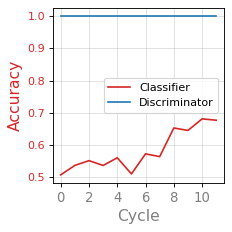

In [19]:
R.plot() # after 12 runs of GP2

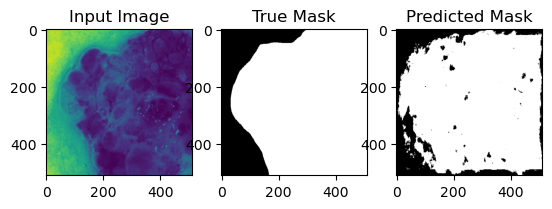

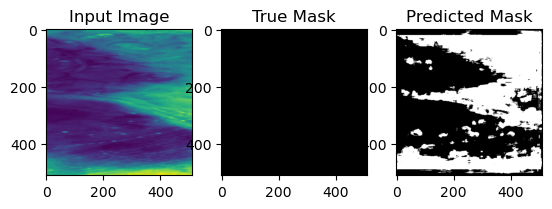

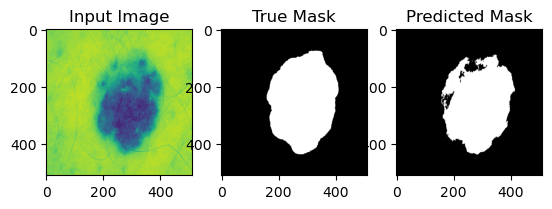

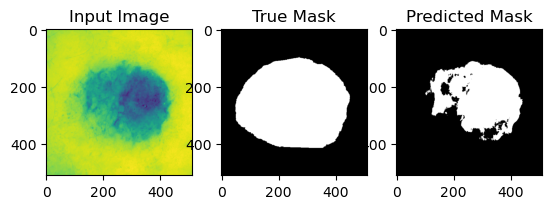

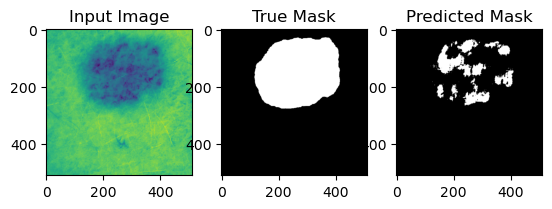

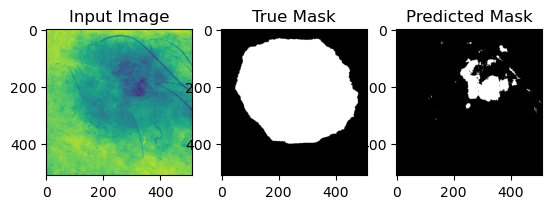

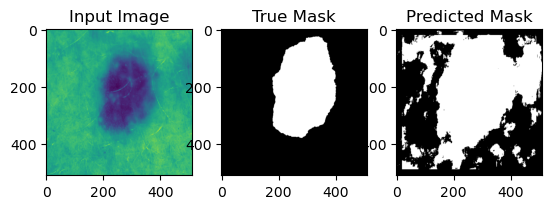

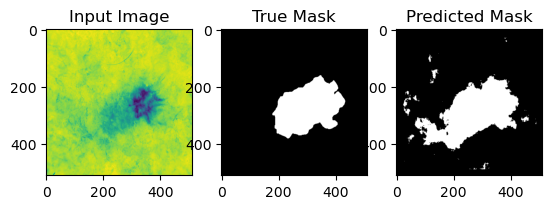

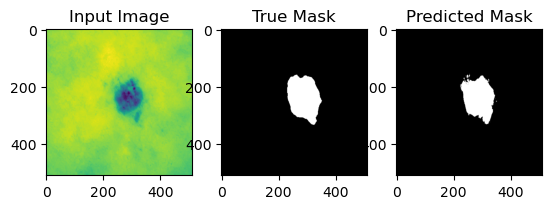

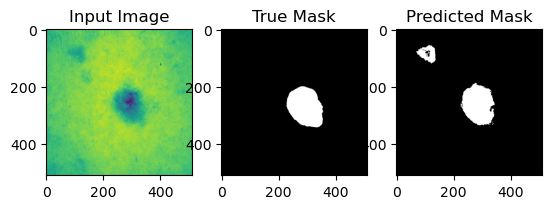

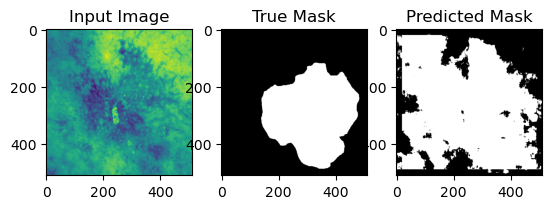

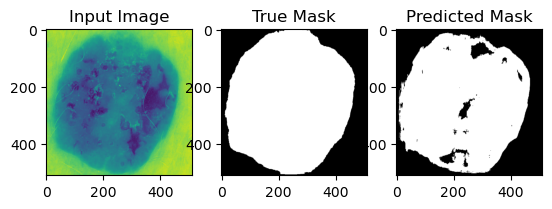

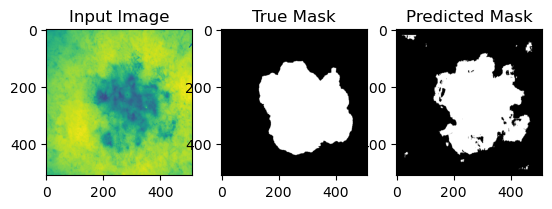

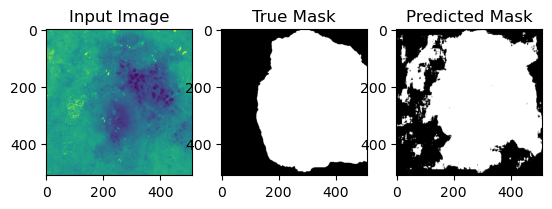

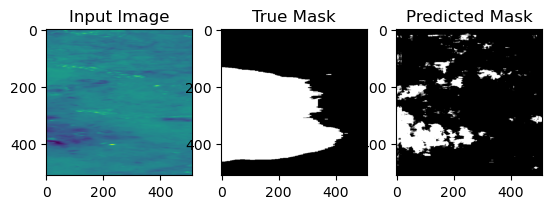

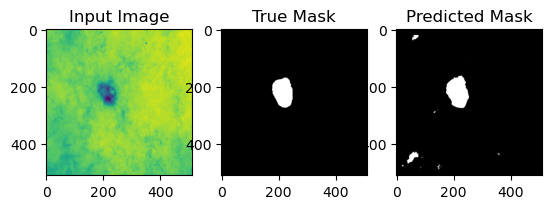

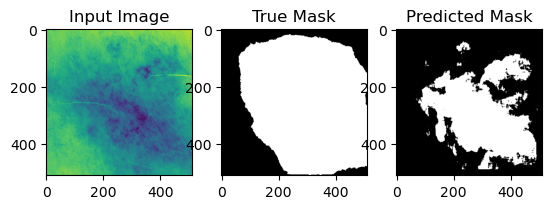

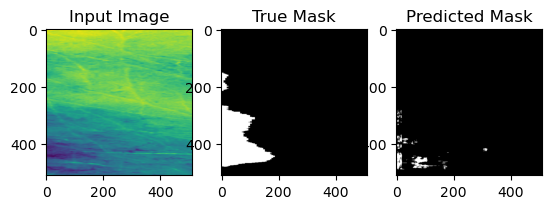

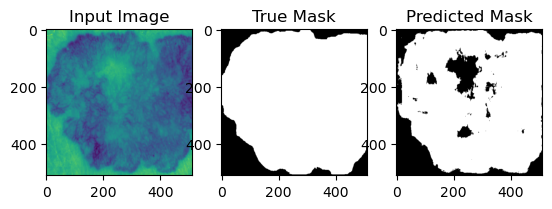

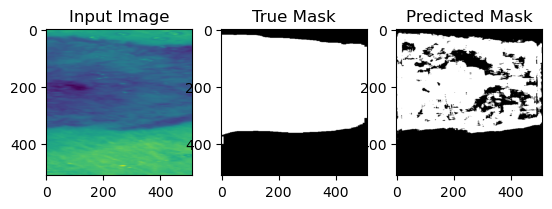

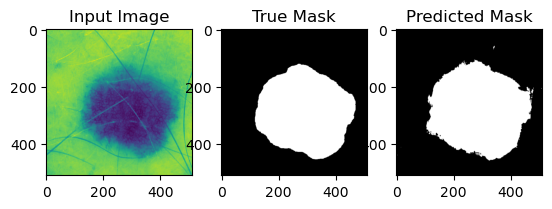

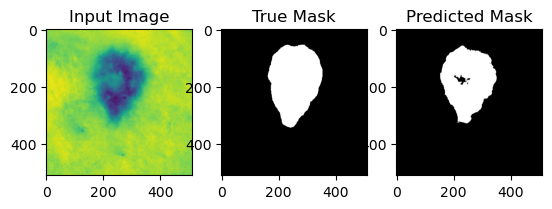

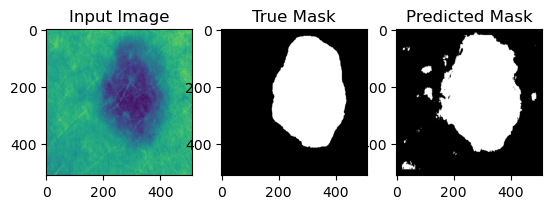

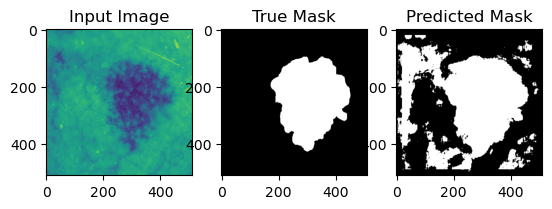

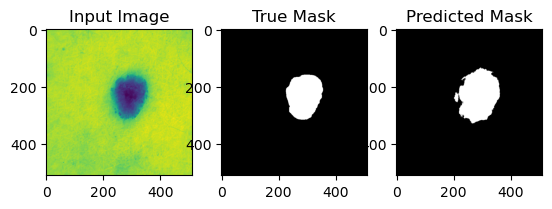

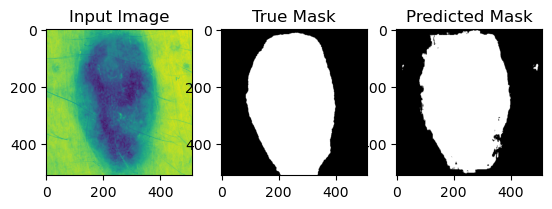

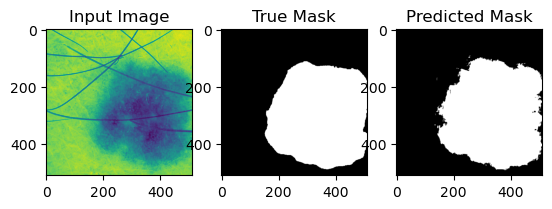

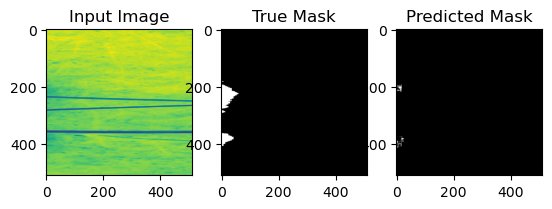

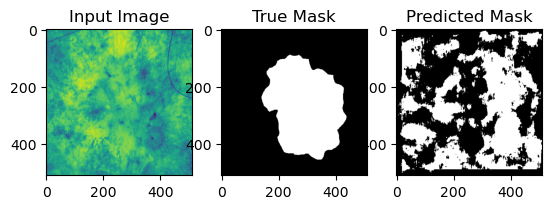

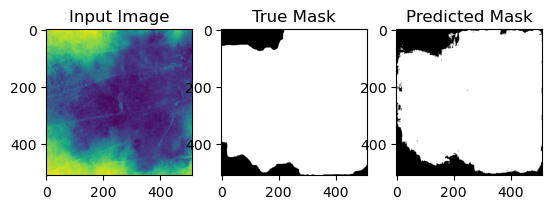

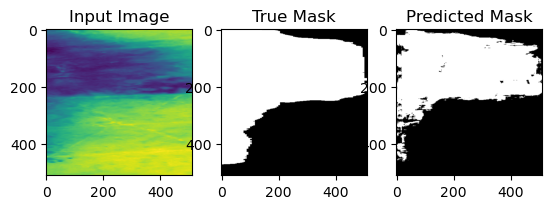

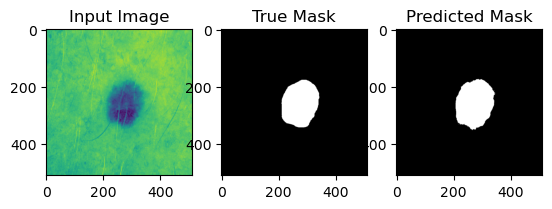

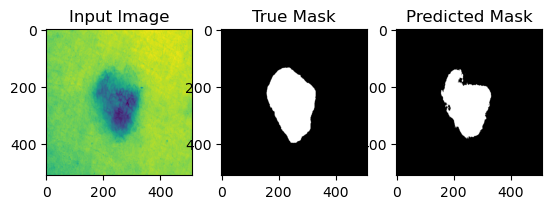

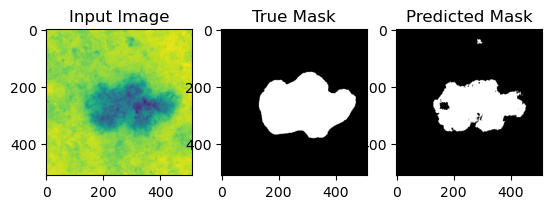

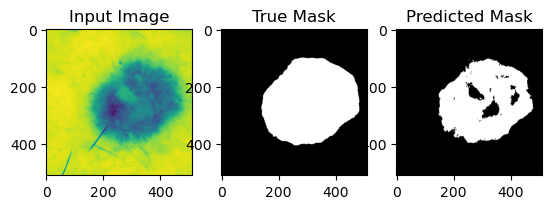

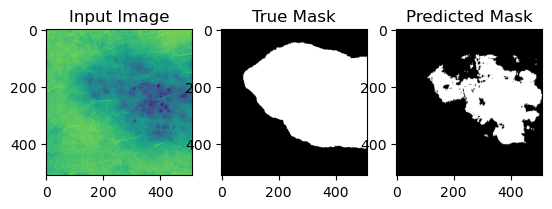

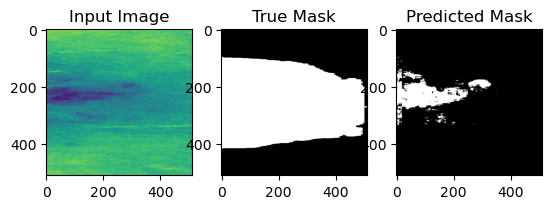

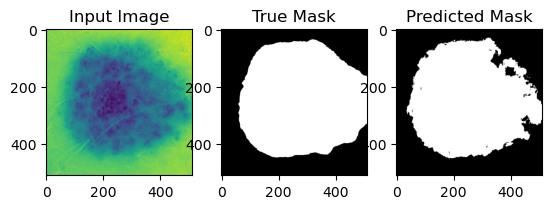

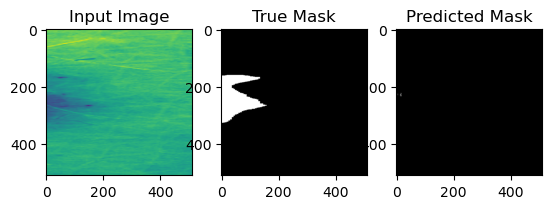

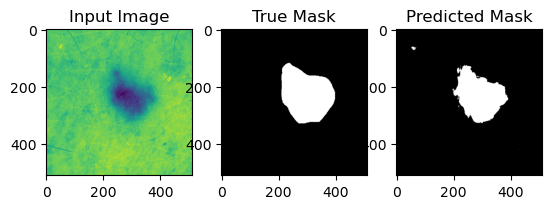

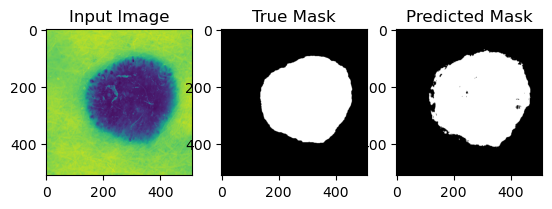

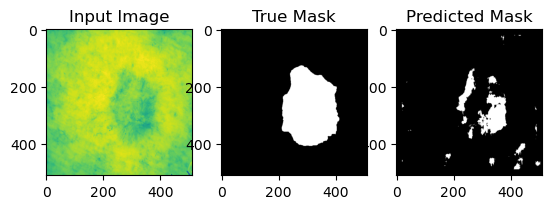

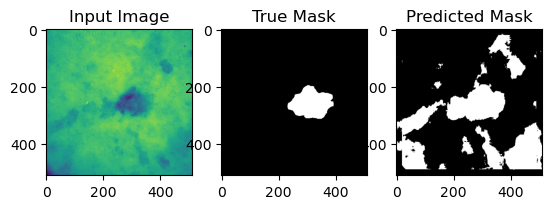

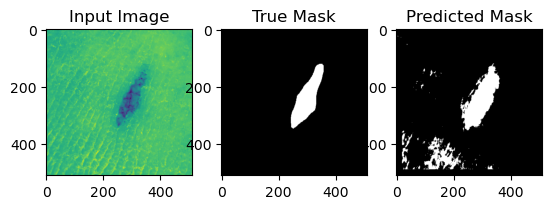

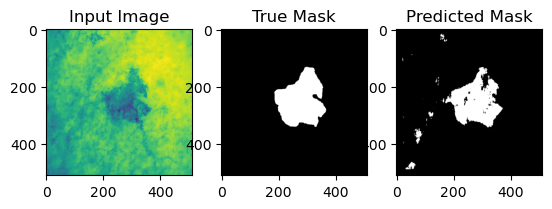

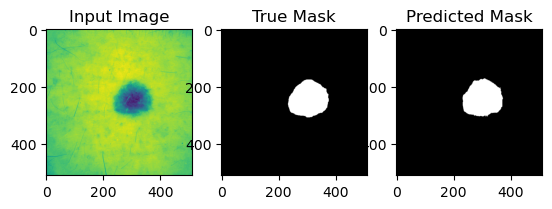

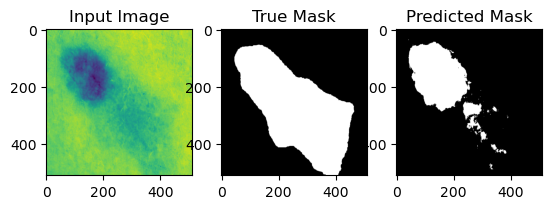

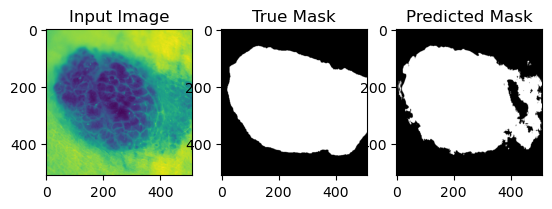

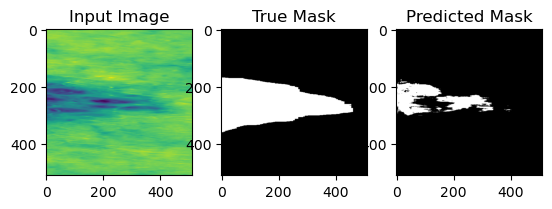

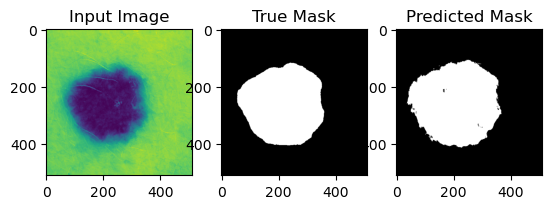

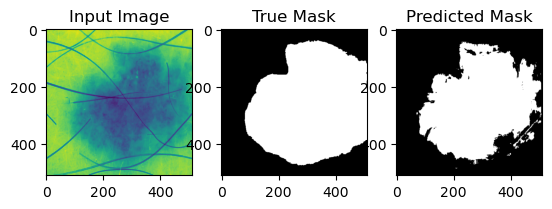

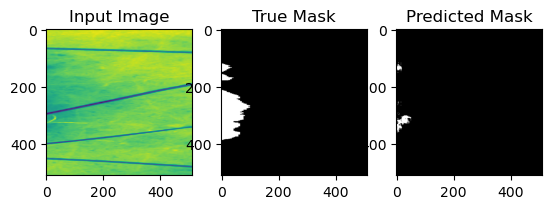

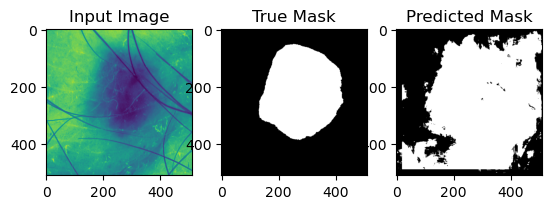

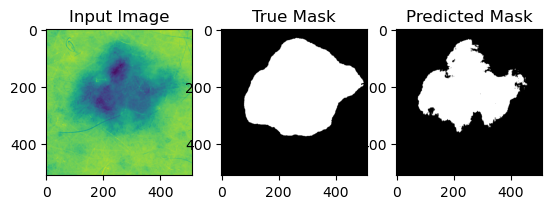

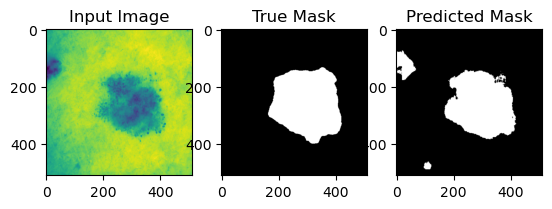

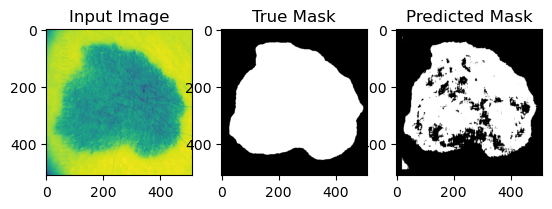

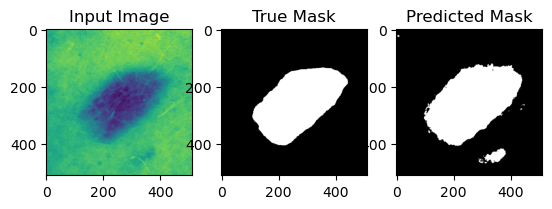

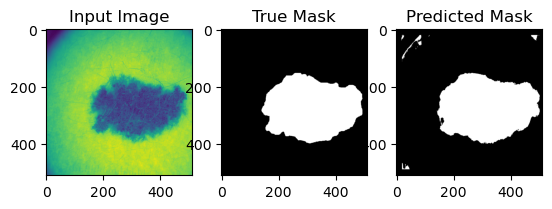

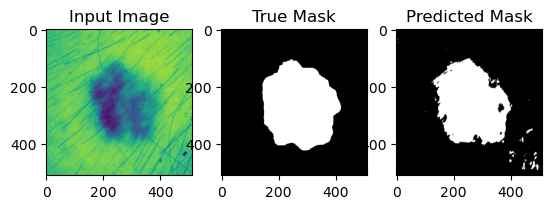

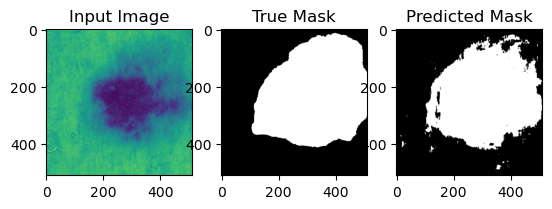

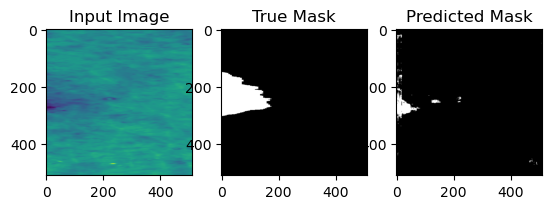

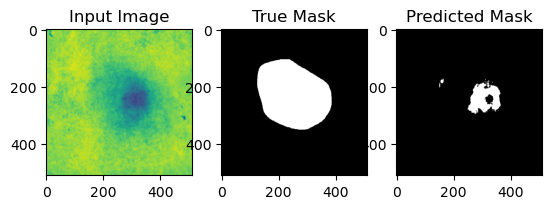

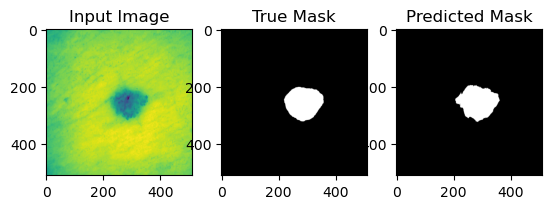

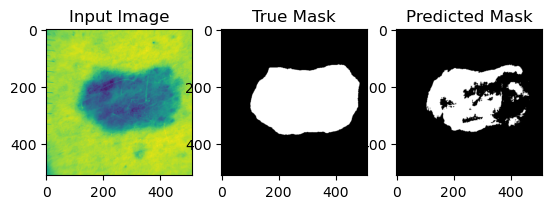

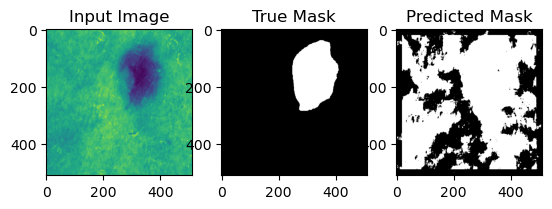

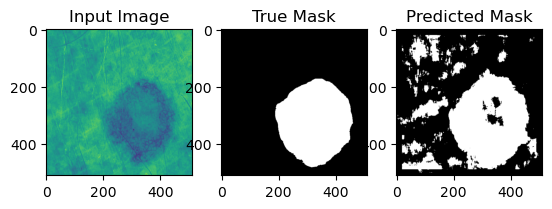

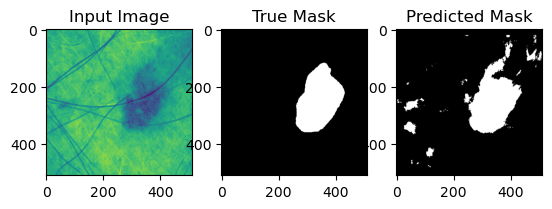

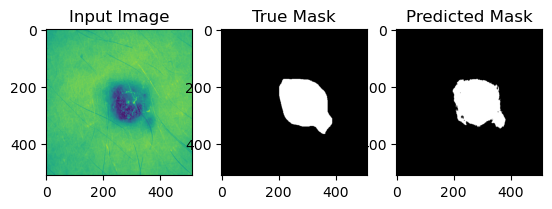

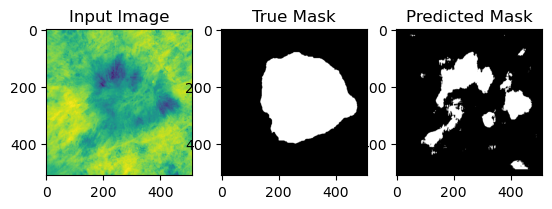

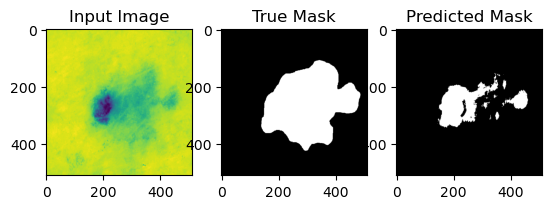

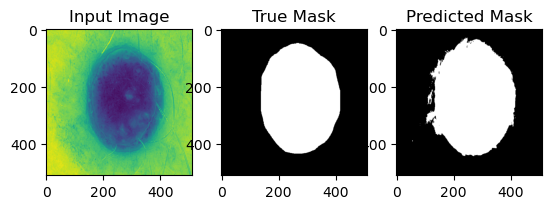

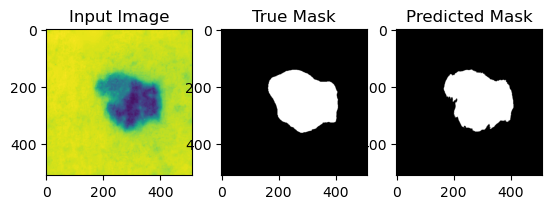

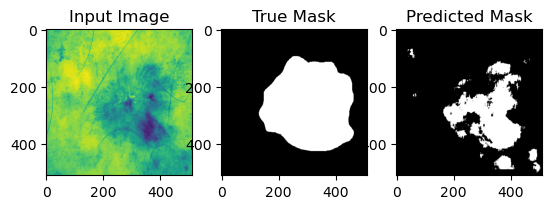

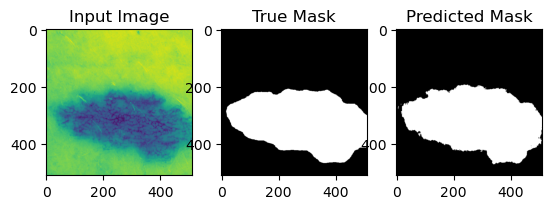

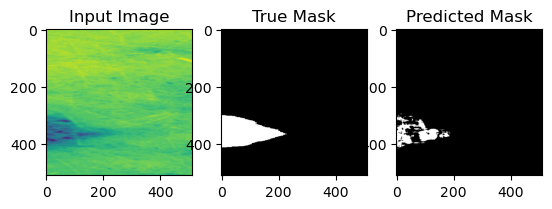

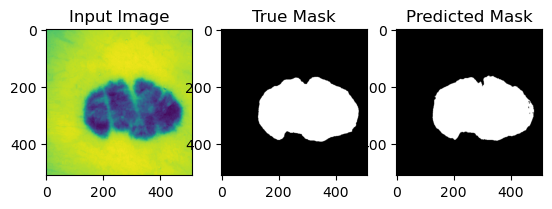

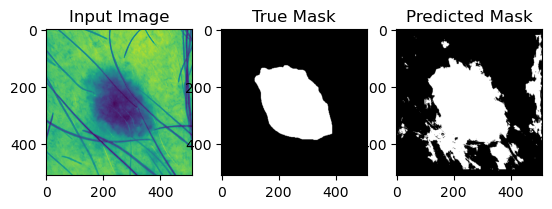

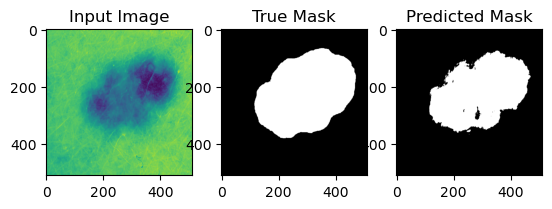

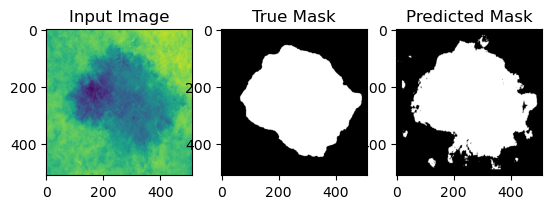

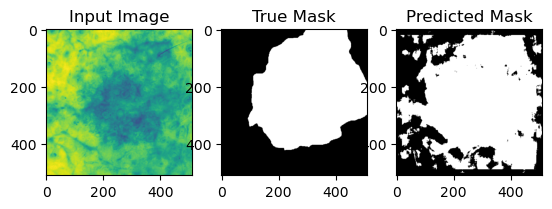

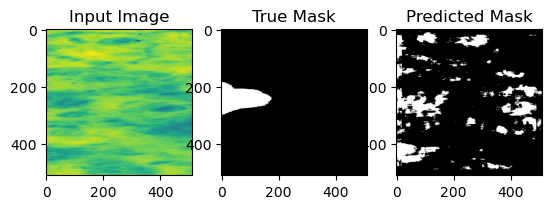

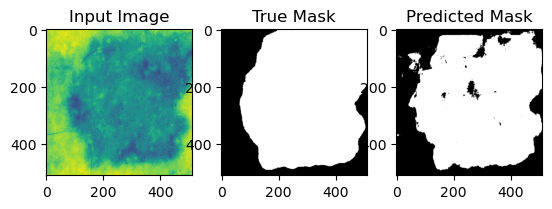

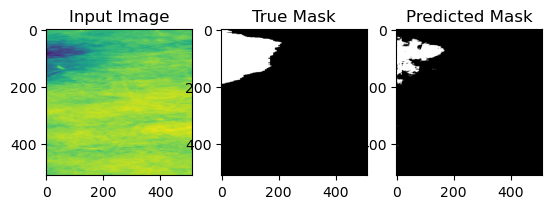

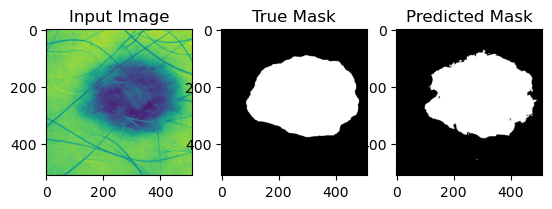

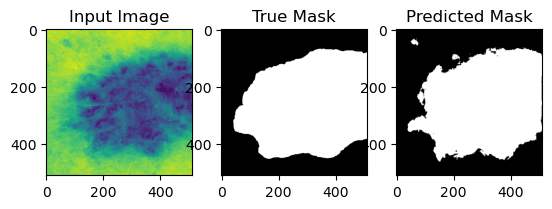

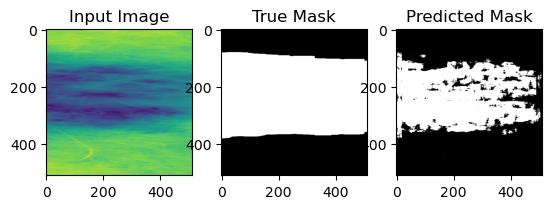

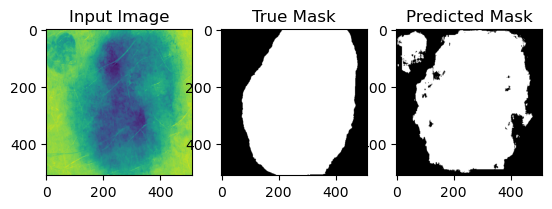

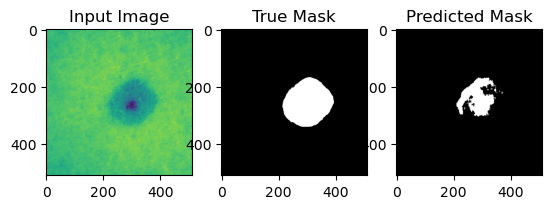

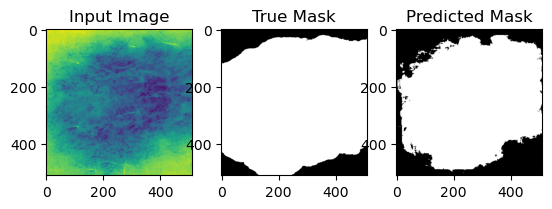

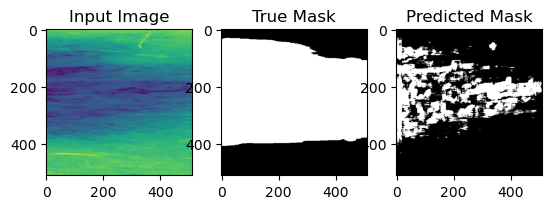

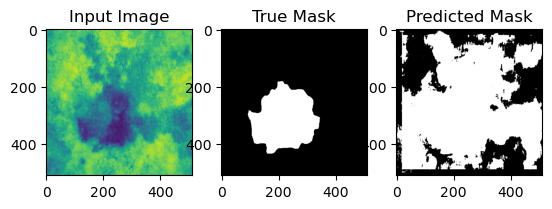

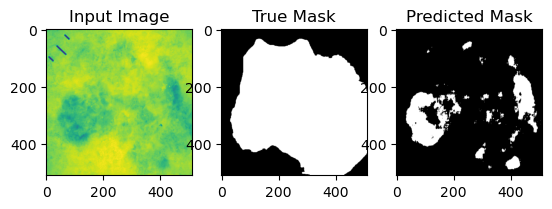

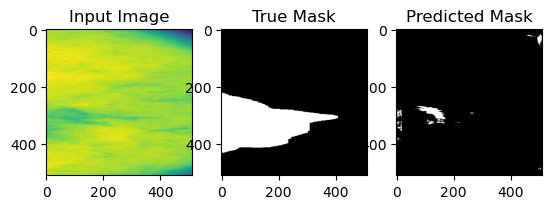

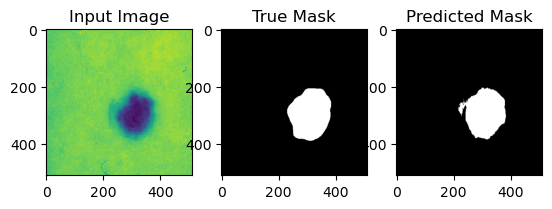

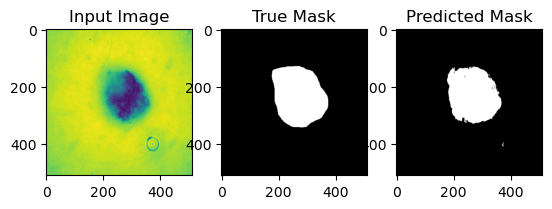

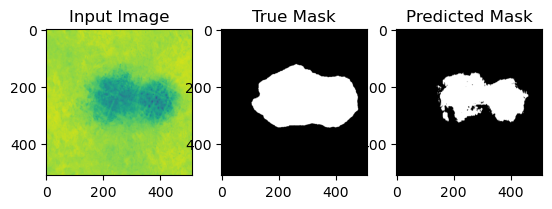

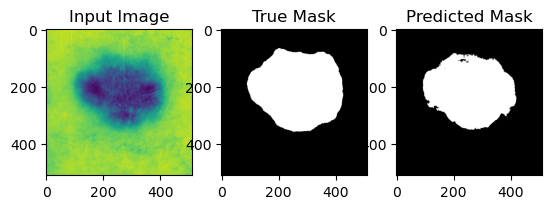

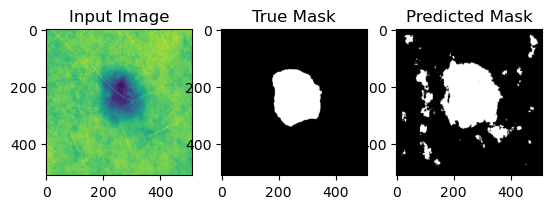

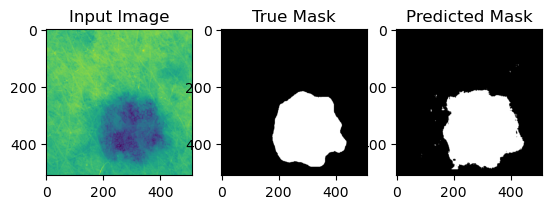

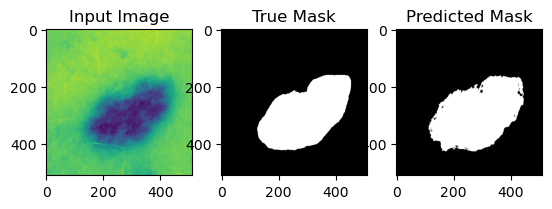

In [20]:
gp2.Util.visualize_predictions(C, images[1000:1500], masks[1000:1500], num_samples=100) # after 12 runs of GP2